 # Tutorial 09 - Neural Networks
 
 ## Dr. David C. Schedl

 Note: this tutorial is geared towards students **experienced in programming** and aims to introduce you to **Digital Imaging / Computer Vision** techniques.



## Setup
As first step, we need to import the necessary libraries. 

In [9]:
# Setup and import of libraries
import math
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_blobs, make_circles


# Let's set the random seed to make this reproducible (the same for everybody).
np.random.seed(1337)
random.seed(1337)

# Let's train an MLP to classify points (like Tensorflow Playground)

We will at first generate some data using scikit-learn.

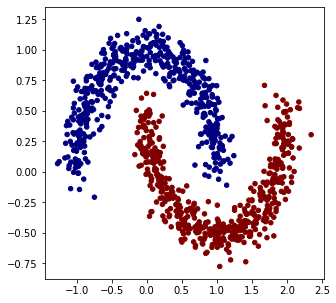

[-1  1]


In [23]:
# make up a dataset
X, y = make_moons(n_samples=1000, noise=0.1)

y = y * 2 - 1  # make y be -1 or 1
# visualize in 2D
plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap="jet")
plt.show()
print(np.unique(y))

Let's set up an MLP in PyTorch. <br>

Our model takes 2 inputs and outputs 1 value. <br>
We will use 2 hidden layers with 16 neurons each. <br>
Thus, our MLP has 337 parameters. <br>


In [34]:
# MLP in PyTorch

import torch
import torch.nn as nn
import torch.nn.functional as F


class TorchMLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2, 16)
        self.fc2 = nn.Linear(16, 16)
        self.fc3 = nn.Linear(16, 1)

    def forward(self, x):
        h1 = torch.tanh(self.fc1(x))
        h2 = torch.tanh(self.fc2(h1))
        o = self.fc3(h2)
        return o


torch_model = TorchMLP()

print(torch_model)
# print number of parameters
print(sum(p.numel() for p in torch_model.parameters()))

TorchMLP(
  (fc1): Linear(in_features=2, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=1, bias=True)
)
337


In [35]:
# initial accuracy (RANDOM)
preds = torch_model(torch.Tensor(X)).data.numpy()
accuracy = [(yi > 0) == (scorei > 0) for yi, scorei in zip(y, preds)]
acc = sum(accuracy) / len(accuracy)
print(acc)

[0.5]


In [36]:
# soft marigin loss
torch_loss_fun = F.soft_margin_loss
optimizer = torch.optim.SGD(
    torch_model.parameters(),
    lr=5,  # learning rate
    weight_decay=1e-4,  # L2 regularization
)
batch_size = None  # mini-batch size

# optimization
for k in range(100):

    # use mini-batch
    if batch_size is None:
        Xb, yb = X, y # entire dataset
    else:
        # use a random batch of the data
        ri = np.random.permutation(X.shape[0])[:batch_size]
        Xb, yb = X[ri], y[ri]

    # reset gradients
    optimizer.zero_grad()

    # forward
    torch_scores = torch_model(torch.from_numpy(Xb).float())
    torch_loss = torch_loss_fun(
        torch_scores, torch.from_numpy(yb).reshape(-1, 1).float()
    )
    # L2 regularization is in the optimizer, now!!

    # backward
    torch_loss.backward()

    # update (sgd)
    optimizer.step()

    # also get accuracy
    accuracy = [
        (yi > 0) == (scorei.data.item() > 0) for yi, scorei in zip(yb, torch_scores)
    ]
    acc = sum(accuracy) / len(accuracy)

    if k % 10 == 0:
        print(f"step {k} loss {torch_loss.data}, accuracy {acc*100}%")

step 0 loss 0.6897923946380615, accuracy 46.0%
step 10 loss 4.0813703536987305, accuracy 73.0%
step 20 loss 0.6776089668273926, accuracy 72.0%
step 30 loss 0.34112823009490967, accuracy 91.0%
step 40 loss 0.35283878445625305, accuracy 91.0%
step 50 loss 0.06692158430814743, accuracy 97.0%
step 60 loss 0.0035845190286636353, accuracy 100.0%
step 70 loss 0.003819381585344672, accuracy 100.0%
step 80 loss 0.0019505544332787395, accuracy 100.0%
step 90 loss 0.0032622970174998045, accuracy 100.0%


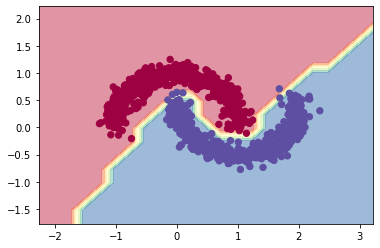

In [37]:
# visualize decision boundary (similar to tensorflow playground)

h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
scores = torch_model(torch.from_numpy(Xmesh).float()).data.numpy()
Z = np.array([s > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

### Exercise 01 📝: Play with the data and the network
 
Change the MLP (number of layers and number of neurons per layer) and see how it affects the decision boundary. 
Switch to the `make_circles` dataset (instead of the `make_moons` function) and see how your network performs. <br>

Try to answer the following questions:
- How many parameters do the networks have and how does that affect performance (accuracy and timing)?
- What is the simplest and most complex network you can train to classify the data? Can it get too complex?
- What happens if you change the batch size? 